<a href="https://colab.research.google.com/github/vivekMishra121/customer-purchase-behavior_Analysis/blob/main/Copy_of_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





#Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

#Solution of Task 1




*  Loading the dataset



In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:

# loading given dataset
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Superstore Marketing Data - Sheet1 copy .csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
data.head()


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [56]:
data.shape

(2240, 22)

In [57]:
#Creating a copy of dataset for further data cleaning as df
df = data.copy()



 ## Data cleaning



In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [59]:
# check for duplicate values in dataset
len(df[df.duplicated()])

0

here we can see there is no duplicate values


*   Here we have unknown characters '######' found in `Dt_Customer` column ,we have
to remove them from our dataset

In [60]:
# we have deleted those rows from our dataset which contain #####

df = df[~df['Dt_Customer'].str.contains('########')]
df


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,7,6,12,1,1,0,3,8,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0




*   check for null values in our dataset




In [61]:
# Missing Values/Null Values Count
print(df.isna().sum().sort_values(ascending = False).head())

Income               13
Id                    0
MntFishProducts       0
Response              0
NumWebVisitsMonth     0
dtype: int64


In [62]:
#here income coloumn has only 13 null values so we drop those rows from dataset
df.dropna(inplace  =True )

<ipython-input-62-5cc57c482418>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace  =True )


In [63]:
print(df.isna().sum().sort_values(ascending = False).head())

Id                   0
Year_Birth           0
Response             0
NumWebVisitsMonth    0
NumStorePurchases    0
dtype: int64


NOW there is no null values in the dataset



*  here `Dt_Customer` is in str data type but only contains date hence
 Changed Data types of column `Dt_Customer` to datetime



In [64]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

<ipython-input-64-5ede84e7ffb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])




*   adding a new column `Age` using `year_Birth` and `Dt_Customer`



In [65]:
# calculating Age of customers

from datetime import datetime

df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

# Calculate age based on 'Year_Birth' and 'Dt_Customer'
df['Age'] = (df['Dt_Customer'] - df['Year_Birth']).astype('<m8[Y]')


<ipython-input-65-c6621de133b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
<ipython-input-65-c6621de133b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = (df['Dt_Customer'] - df['Year_Birth']).astype('<m8[Y]')




*   Summary of Basic Statistics:



In [66]:
# Display the summary statistics DataFrame
summary_stats = df.describe()
summary_stats

,Id,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,5447.928299,51429.747521,0.435545,0.501907,49.302059,302.807018,25.255530,162.717010,36.471396,26.922960,43.874905,2.317315,4.081617,2.594966,5.794050,5.410374,0.151793,0.009153,44.349352
std,3233.235292,20960.186407,0.530234,0.542644,28.802571,339.168809,38.626568,219.717636,54.469746,41.042551,52.092779,1.897366,2.709366,2.833540,3.269614,2.433422,0.358957,0.095270,12.142915
min,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,2735.000000,35541.000000,0.000000,0.000000,24.500000,23.000000,1.000000,15.000000,2.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,36.000000
50%,5231.000000,50447.000000,0.000000,0.000000,50.000000,171.000000,7.000000,66.000000,11.000000,8.000000,25.000000,2.000000,4.000000,1.000000,5.000000,6.000000,0.000000,0.000000,43.000000
75%,8205.500000,68211.000000,1.000000,1.000000,74.000000,495.500000,31.000000,217.000000,45.500000,32.000000,54.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,54.000000
max,11188.000000,157146.000000,2.000000,2.000000,99.000000,1492.000000,197.000000,1725.000000,253.000000,262.000000,249.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,121.000000


Distribution of customer demographics(Birth year,Education,Income,Marital_Status) in our Dataset

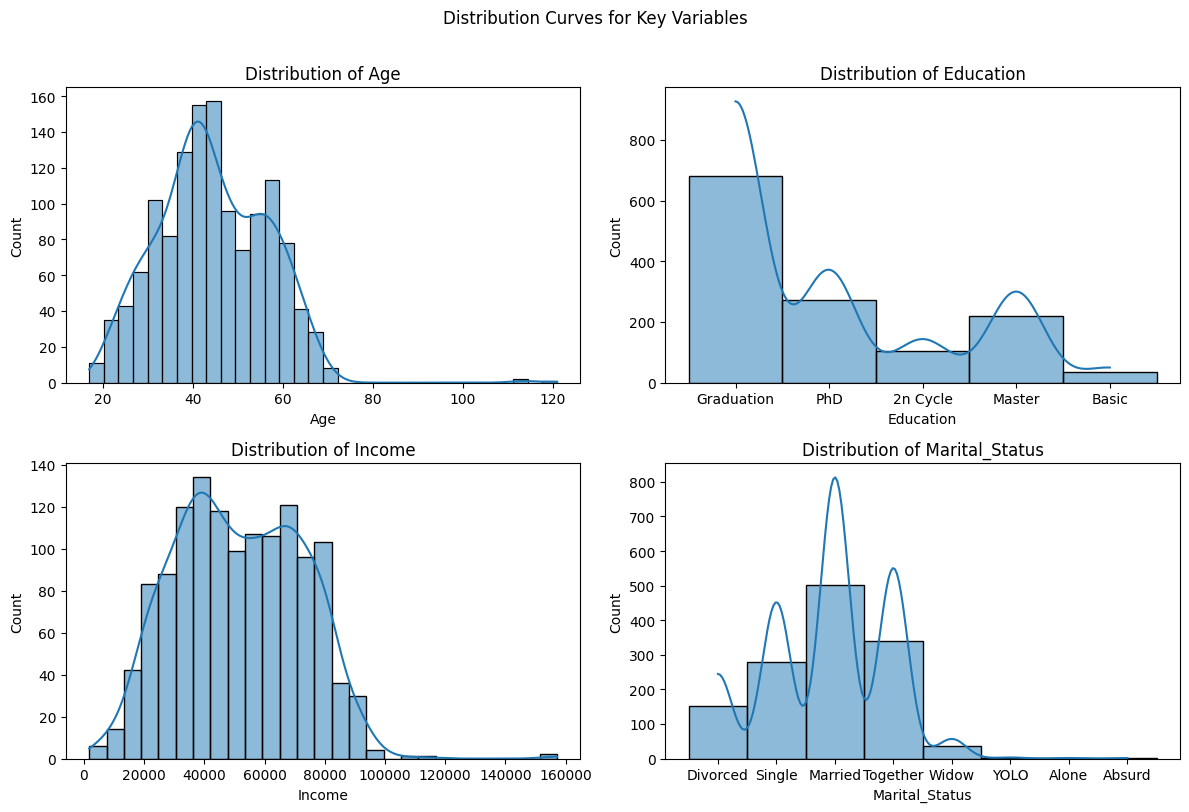

In [67]:
key_variable = ['Age',"Education",'Income',"Marital_Status"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.suptitle('Distribution Curves for Key Variables', y=1.01)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot distribution curves for each variable
for i, var in enumerate(df[key_variable]):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')


plt.tight_layout()
plt.show()

#Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

#Solution of Task 2



*  Lets first calculate measures of central tendency (mean, median, mode)



In [68]:
# Lets first calculate measures of central tendency (mean, median, mode)
# 1 : Mean
import numpy as np
key_variable = ['Age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']
mean = df[key_variable].mean()
print(f'mean of selected variables of datasets are:\n {mean}')

mean of selected variables of datasets are:
 Age                     44.349352
Income               51429.747521
Recency                 49.302059
MntWines               302.807018
MntFruits               25.255530
MntMeatProducts        162.717010
MntFishProducts         36.471396
NumDealsPurchases        2.317315
MntGoldProds            43.874905
NumWebPurchases          4.081617
NumWebVisitsMonth        5.410374
dtype: float64


In [69]:
# 2 : Median
key_variable = ['Age','Income','Recency','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
median =df[key_variable].median()
print(f'median of key variables of datasets are:\n {median}')

median of key variables of datasets are:
 Age                     43.0
Income               50447.0
Recency                 50.0
Kidhome                  0.0
Teenhome                 0.0
MntWines               171.0
MntFruits                7.0
MntMeatProducts         66.0
MntFishProducts         11.0
NumDealsPurchases        2.0
NumWebPurchases          4.0
NumWebVisitsMonth        6.0
dtype: float64


In [70]:
# 3 : Mode
key_variable2 = ['Complain','Response','Income',"Age",'Kidhome','Teenhome','MntWines','NumWebVisitsMonth']
mode = df[key_variable2].mode()
print(f'mode of salected columns of datasets are:\n {mode}')

mode of salected columns of datasets are:
    Complain  Response   Income   Age  Kidhome  Teenhome  MntWines  \
0       0.0       0.0   7500.0  41.0      0.0       0.0       2.0   
1       NaN       NaN  35860.0   NaN      NaN       NaN       NaN   

   NumWebVisitsMonth  
0                7.0  
1                NaN  




*    Now claculate measures of dispersion (variance, standard deviation)



In [71]:
# Variance
key_variable = ['Age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
variance =  df[key_variable].var()
print('variance of key variaable is :\n',variance)

variance of key variaable is :
 Age                  1.474504e+02
Income               4.393294e+08
Recency              8.295881e+02
MntWines             1.150355e+05
MntFruits            1.492012e+03
MntMeatProducts      4.827584e+04
MntFishProducts      2.966953e+03
MntGoldProds         2.713658e+03
NumDealsPurchases    3.599998e+00
NumWebPurchases      7.340662e+00
NumWebVisitsMonth    5.921541e+00
dtype: float64


In [72]:
# Standard Deviation

std_dev = df[key_variable].std()
print('Standard deviation of key variaable is :\n',std_dev)

Standard deviation of key variaable is :
 Age                     12.142915
Income               20960.186407
Recency                 28.802571
MntWines               339.168809
MntFruits               38.626568
MntMeatProducts        219.717636
MntFishProducts         54.469746
MntGoldProds            52.092779
NumDealsPurchases        1.897366
NumWebPurchases          2.709366
NumWebVisitsMonth        2.433422
dtype: float64




*   Lets find outliars, if any is present in our dataset



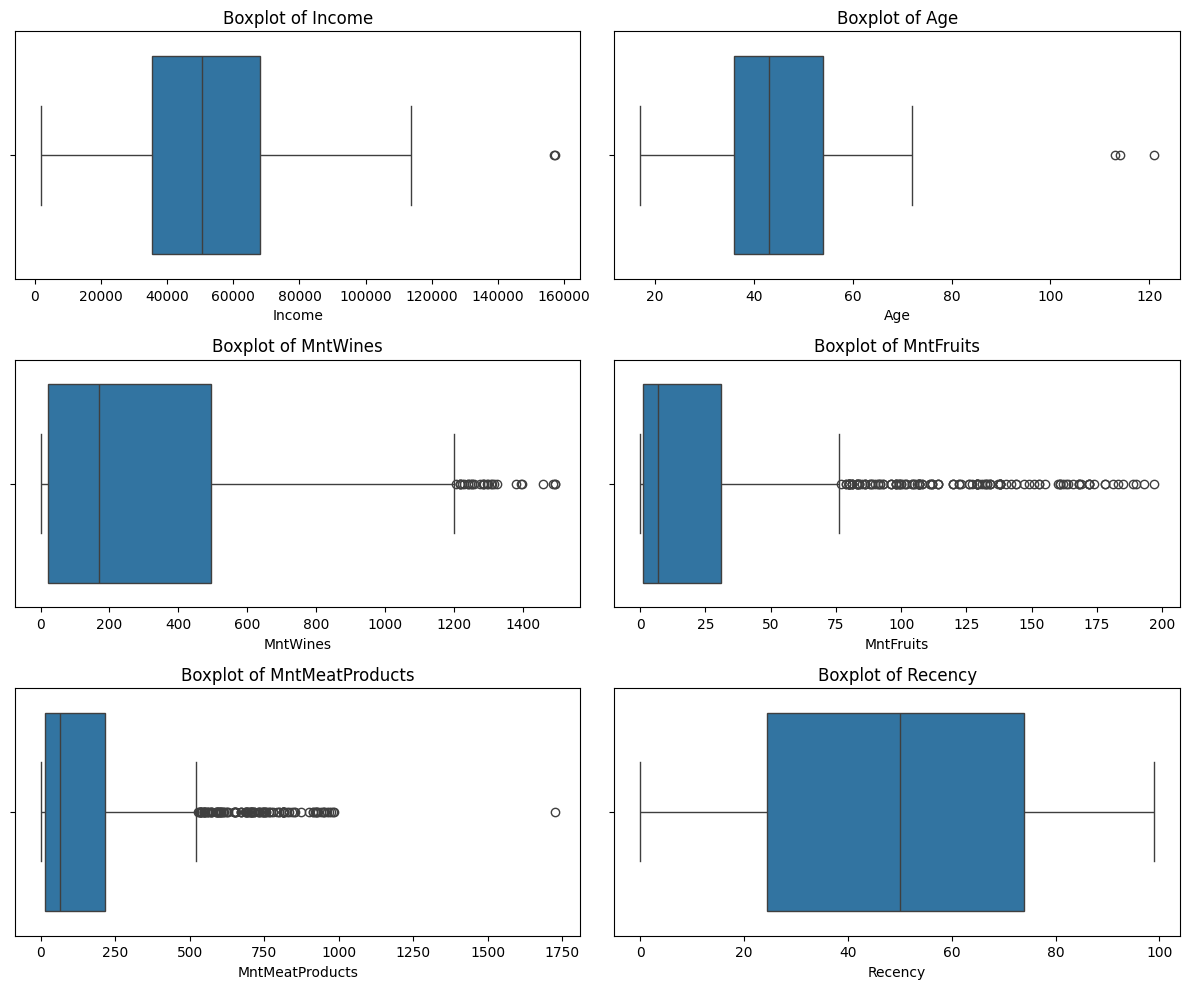

In [73]:
# we will plot a box plot to detect outliars
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
key_variables = ['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts','Recency']

num_variables = len(key_variables)
num_rows = (num_variables + 1) // 2  # Round up to the nearest integer

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot box plots for each variable
for i, variable in enumerate(key_variables):
    sns.boxplot(x=variable, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

plt.tight_layout()
plt.show()



There are outliars present in various columns in our dataset...so we will remove this by IQR method below

In [74]:

# Using IQR Method
columns_with_outliers = ['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts']

def remove_outliers(data, columns):   # created a function of removal of outliars Based On IQR in all the columns simultaneously

    for column in columns:
        Q1 = data[column].quantile(0.20)
        Q3 = data[column].quantile(0.80)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outlier removal
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

# Remove outliers from specified columns
df_new = remove_outliers(df, columns_with_outliers)

Lets Plot the variable in boxplot to check outliars are cleaned or not

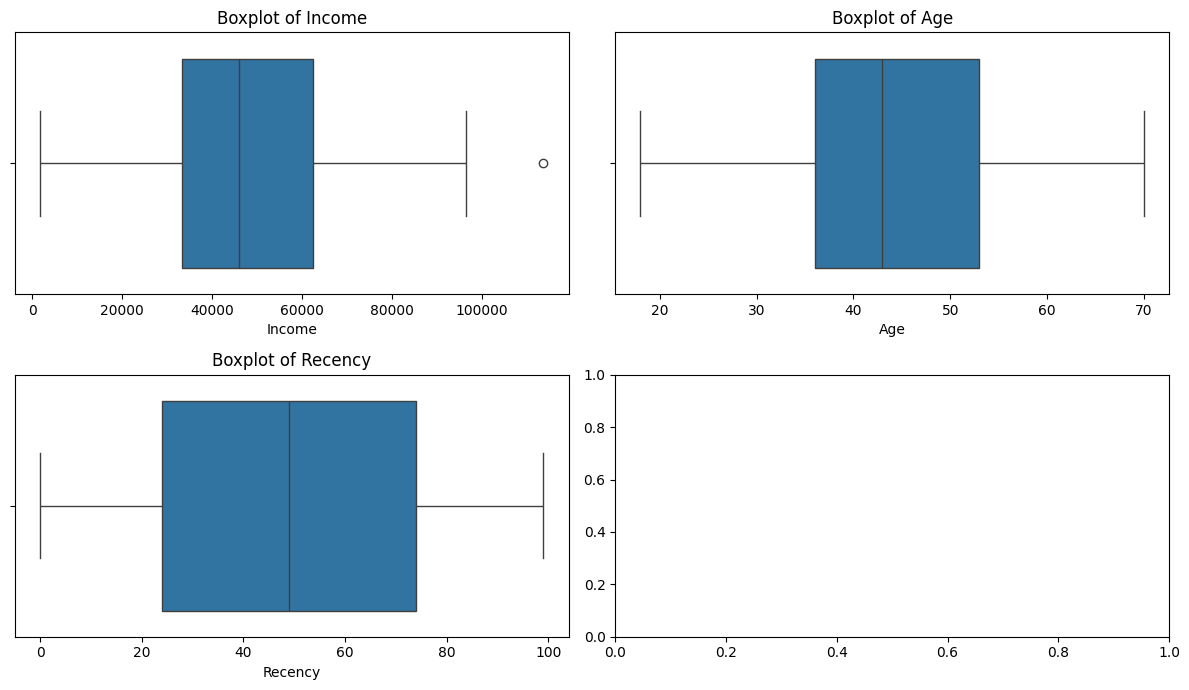

In [75]:

key_variables = ['Income', 'Age', 'Recency']

num_variables = len(key_variables)

# Create subplots
fig, axes = plt.subplots(nrows=  2, ncols=2, figsize=(12, 7))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot box plots for each variable
for i, variable in enumerate(key_variables):
    sns.boxplot(x=variable, data=df_new, ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

plt.tight_layout()
plt.show()

### we can see almost all the outliars are removed

# Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

# Solution of Task 3

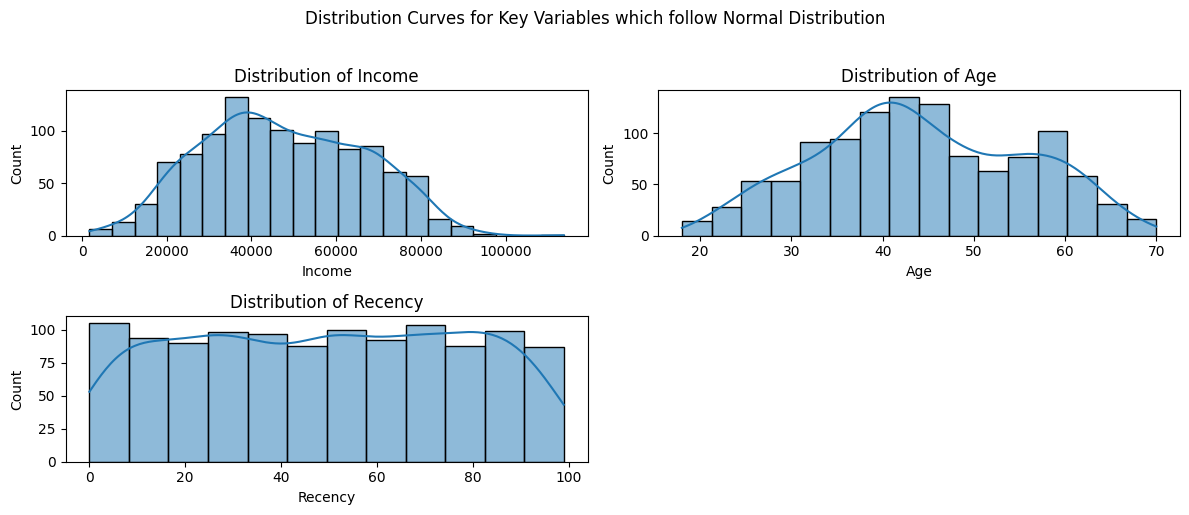

In [76]:
# lets First plot the distribution of variable which follow normal or close to normal distribution

key_variable1 = ['Income','Age','Recency']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
fig.suptitle('Distribution Curves for Key Variables which follow Normal Distribution', y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot distribution curves for each variable
for i, var in enumerate(key_variable1):
    sns.histplot(df_new[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Remove empty subplots
for i in range(len(key_variable1), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [77]:
# Lets Calculate Probabilities and Expectation of key variables
# 1. Lets calculate first for Income :
import numpy as np
from scipy.stats import norm

mean_income = np.mean(df_new['Income'])
std_dev_income = np.std(df_new['Income'])

# Calculate probabilities
prob_less_than_70000 = norm.cdf(70000, loc=mean_income, scale=std_dev_income)
prob_greater_than_80000 = 1 - norm.cdf(80000, loc=mean_income, scale=std_dev_income)

print(f"Probability of income less than $700,00: {prob_less_than_70000:.4f}")
print(f"Probability of income greater than $80,000: {prob_greater_than_80000:.4f}")

# Calculate expected value (mean)
expected_income = mean_income
print(f"Expected income: {expected_income:.2f}")



Probability of income less than $700,00: 0.8828
Probability of income greater than $80,000: 0.0429
Expected income: 47529.71


In [78]:
# 2. Calculating Probability and Expected Values for Age :

mean_age = np.mean(df_new['Age'])
std_dev_age = np.std(df_new['Age'])

# Calculate probabilities
prob_less_than_30 = norm.cdf(30, loc=mean_age, scale=std_dev_age)
prob_greater_than_40 = 1 - norm.cdf(40, loc=mean_age, scale=std_dev_age)

print(f"Probability of age less than 30: {prob_less_than_30:.2f}")
print(f"Probability of age greater than 40: {prob_greater_than_40:.2f}")

# Calculate expected value (mean)
expected_age = mean_age
print(f"Expected age: {expected_age:.2f}")

Probability of age less than 30: 0.11
Probability of age greater than 40: 0.64
Expected age: 44.13


In [79]:
#3. Lets calculate for Recency (No of days since last purchase made)

mean_recency = np.mean(df_new['Recency'])
std_dev_recency = np.std(df_new['Recency'])

# Calculate probabilities
prob_less_than_10 = norm.cdf(10, loc=mean_recency, scale=std_dev_recency)
prob_greater_than_15 = 1 - norm.cdf(15, loc=mean_recency, scale=std_dev_recency)

print(f"Probability of recency less than 10: {prob_less_than_10:.4f}")
print(f"Probability of recency greater than 15: {prob_greater_than_15:.4f}")

# Calculate expected value (mean)
expected_recency = mean_recency
print(f"Expected recency: {expected_recency:.2f}")


Probability of recency less than 10: 0.0876
Probability of recency greater than 15: 0.8814
Expected recency: 48.95


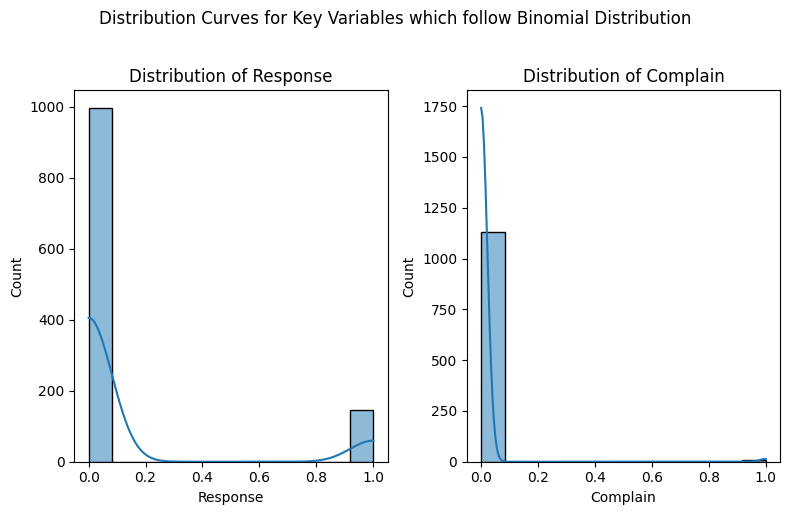

In [80]:
# lets plot the distribution of variable which follow Binomial Distribution

key_variable2 = ['Response','Complain']


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
fig.suptitle('Distribution Curves for Key Variables which follow Binomial Distribution', y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot distribution curves for each variable
for i, var in enumerate(key_variable2):
    sns.histplot(df_new[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Remove empty subplots
for i in range(len(key_variable2), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [81]:
# Lets Calculate Probability and expected values for Response (if customer accepted the offer in the last campaign or Not )
# and for Complain(complain made in last 2 years) variable

from scipy.stats import binom

n_response = len(df['Response'])  # number of trials for Response
p_response = np.mean(df['Response'])  # probability of success for Response
k1 = np.sum(df['Response'] == 1)      # No of success for getting response 1

n_complain = len(df['Complain'])  # number of trials for Complain
p_complain = np.mean(df['Complain'])  # probability of success for Complain
k2 = np.sum(df['Complain'] == 1)    # No of complain for getting response 1

# Calculate probabilities using the PMF
prob_response_1 = binom.pmf(k1, n_response, p_response)
prob_complain_1 = binom.pmf(k2, n_complain, p_complain)

print(f"Probability of Response being 1: {prob_response_1:.4f}")
print(f"Probability of Complain being 1: {prob_complain_1:.4f}")

# Calculate expected values (means)
expected_response = n_response * p_response
expected_complain = n_complain * p_complain

print(f"Expected value for Response: {expected_response:.2f}")
print(f"Expected value for Complain: {expected_complain:.2f}")


Probability of Response being 1: 0.0307
Probability of Complain being 1: 0.1149
Expected value for Response: 199.00
Expected value for Complain: 12.00


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

# Solution of Task 4

###1. for showing relationship between diffrent variables first we plot Heatmap

<ipython-input-82-8557e892030c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_new.corr().round(2)


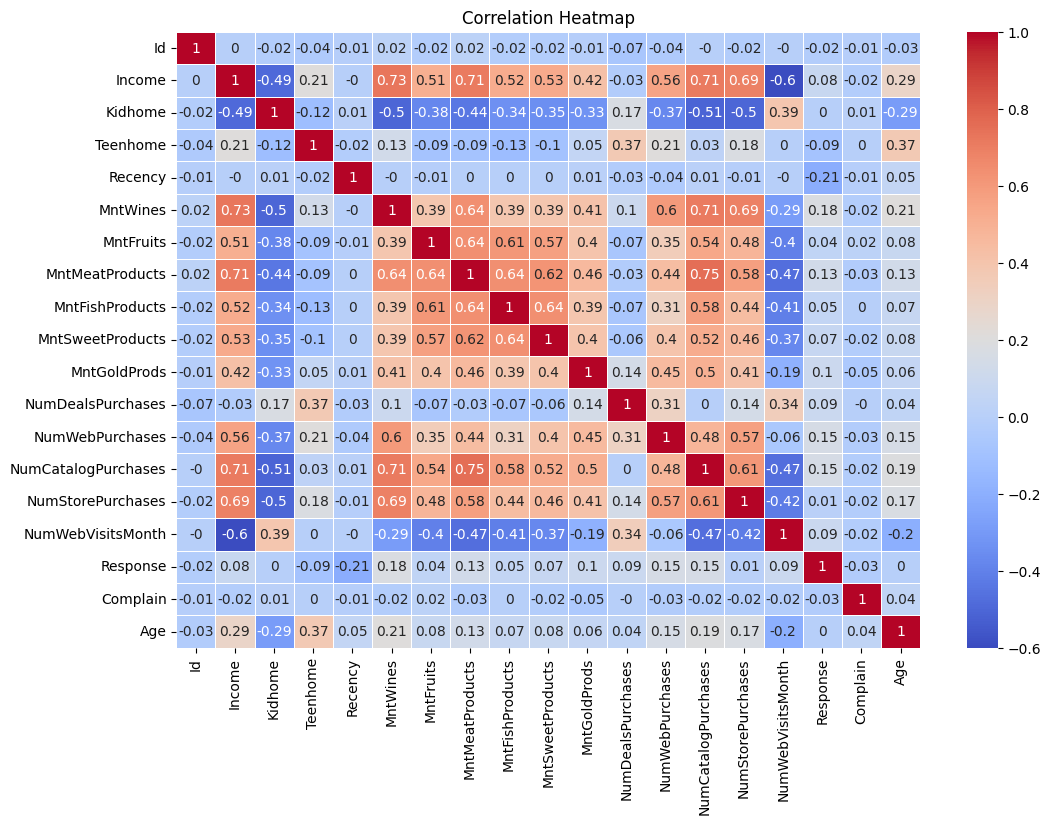

In [82]:
correlation_matrix = df_new.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* Insights:
we can conclude that `Age`and `Income` have positively correlated and
`Response` and `Income` have also positively correlation that means customer
having high income responded most


###2. Grouped Bar chart for Education and Marital Status Distribution

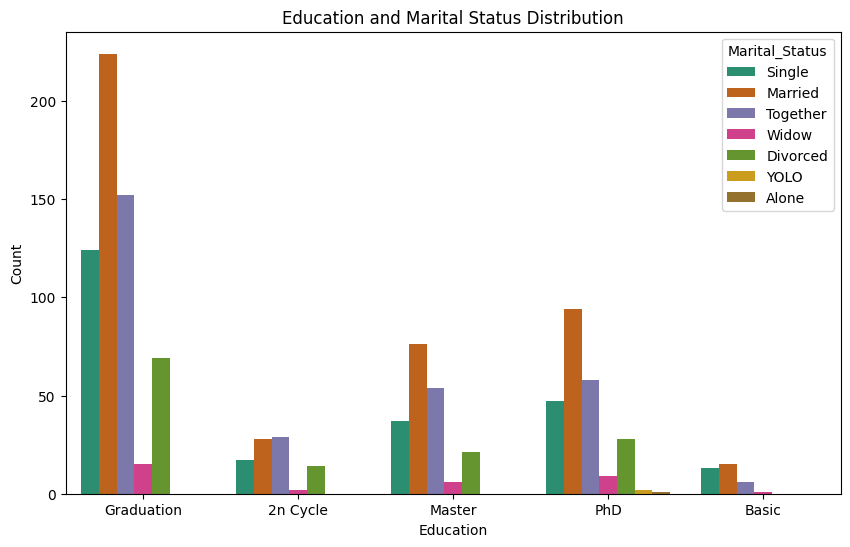

In [83]:
# Distribution of 'Education' and 'Marital_Status'

plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df_new, hue='Marital_Status', palette='Dark2')
plt.title('Education and Marital Status Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

* Insights: most number of people are Graduated and Married and very few people have done basic education

In [84]:

df_new['TotalSpending'] = df_new[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

##We will now segment customer based on total spending and income of customers

In [85]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

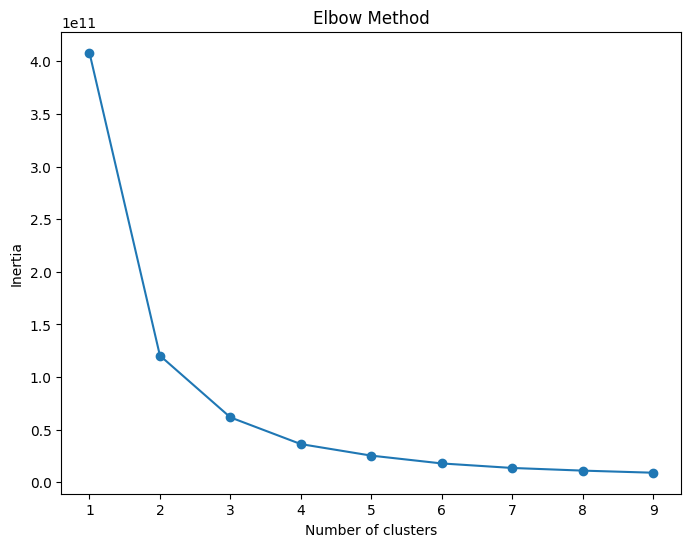

In [86]:
# Applying k-means with different number of clusters
inertia = []  # List to store the inertia for each k
key_variable = ['Income','TotalSpending']
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_new[key_variable])
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, 10))
plt.show()


In [98]:

# K-means clustering based on spending behavior columns
from sklearn.cluster import KMeans

features_for_clustering = ['Income','TotalSpending']

num_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_new['Cluster1'] = kmeans.fit_predict(df_new[features_for_clustering])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


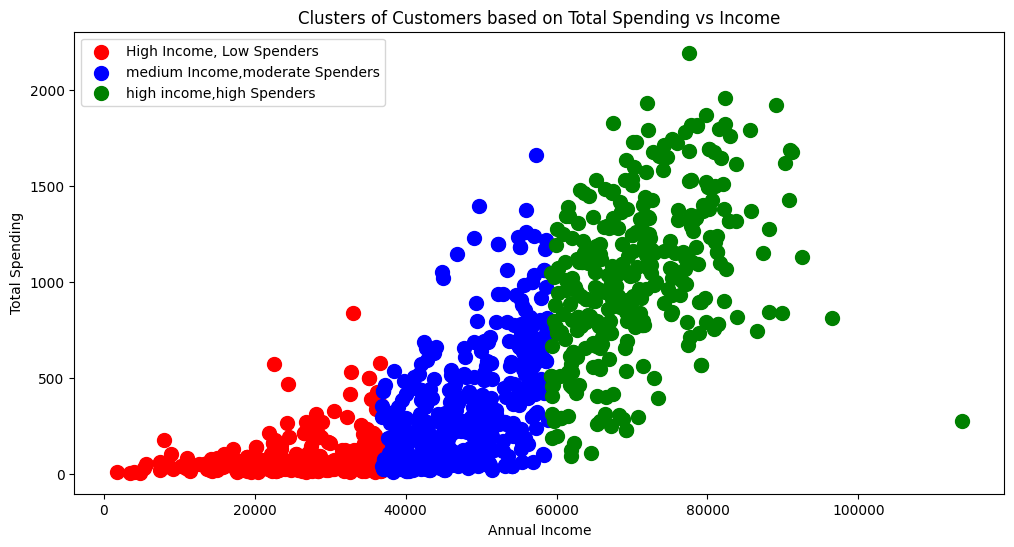

In [99]:
plt.figure(figsize = (12,6))

# Visualizing the clusters based on 'TotalSpending' and 'Income'
plt.scatter(df_new[df_new['Cluster1'] == 0]['Income'], df_new[df_new['Cluster1'] == 0]['TotalSpending'], s=100, c='red', label='High Income, Low Spenders')
plt.scatter(df_new[df_new['Cluster1'] == 1]['Income'], df_new[df_new['Cluster1'] == 1]['TotalSpending'], s=100, c='blue', label='medium Income,moderate Spenders')
plt.scatter(df_new[df_new['Cluster1'] == 2]['Income'], df_new[df_new['Cluster1'] == 2]['TotalSpending'], s=100, c='green', label='high income,high Spenders')

plt.title('Clusters of Customers based on Total Spending vs Income')
plt.xlabel('Annual Income')
plt.ylabel('Total Spending')
plt.legend()
plt.show()

* **Insights**:
 here we can conclude that mostly people are high income and High spenders followed by Low income and Low spenders

##Now we will segment customers based on their spending habbits

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


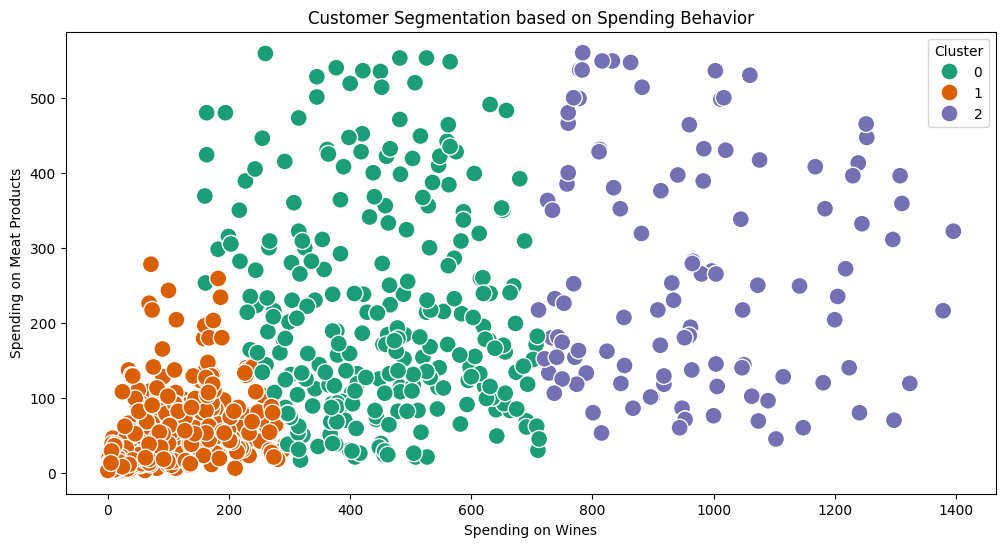

In [102]:
# Customer Segmentation

# K-means clustering based on spending behavior columns
from sklearn.cluster import KMeans

features_for_clustering = df_new[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                              'MntSweetProducts', 'MntGoldProds']]

num_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_new['Cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MntWines', y='MntMeatProducts', hue='Cluster', data=df_new, palette='Dark2',s =150)
plt.title('Customer Segmentation based on Spending Behavior')
plt.xlabel('Spending on Wines')
plt.ylabel('Spending on Meat Products')
plt.show()



* **Insights**: we can see there is big cluster of high spending on wines vs spending on meat products

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Solution of Task 5





* **Data Manipulation**





 Create a new Column Month and Day from `Dt_Customer` for time series analysis

In [90]:

df_new['month'] = df_new['Dt_Customer'].dt.strftime('%B')


In [91]:
df_new['Day'] =  df_new['Dt_Customer'].dt.strftime('%A')



##   **Data Visualization**





###1. Line Chart for showing number of Website visits per Month

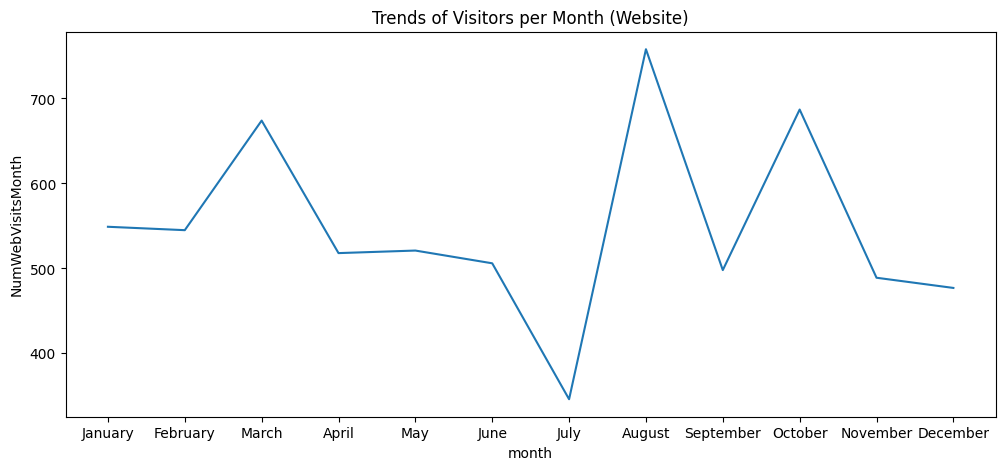

In [92]:
# we want a specific order of month so we define it in a list
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
# Converted'Month' to a categorical variable with a specified order
df_new['month'] = pd.Categorical(df_new['month'], categories=month_order, ordered=True)

plt.figure(figsize = (12,5))
sns.lineplot(x='month', y='NumWebVisitsMonth', data=df_new.groupby('month')['NumWebVisitsMonth'].sum().reset_index())
plt.title('Trends of Visitors per Month (Website)')
plt.show()




*   Insights : highest number of visits in `Auguest` and lowest number of visits in `July`



###2.   Bar chart for showing Number of Purchase made through website per month



<ipython-input-93-b663d97fc60a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='NumWebPurchases', data=df_new.groupby('month')['NumWebPurchases'].sum().reset_index(), palette = 'Dark2')


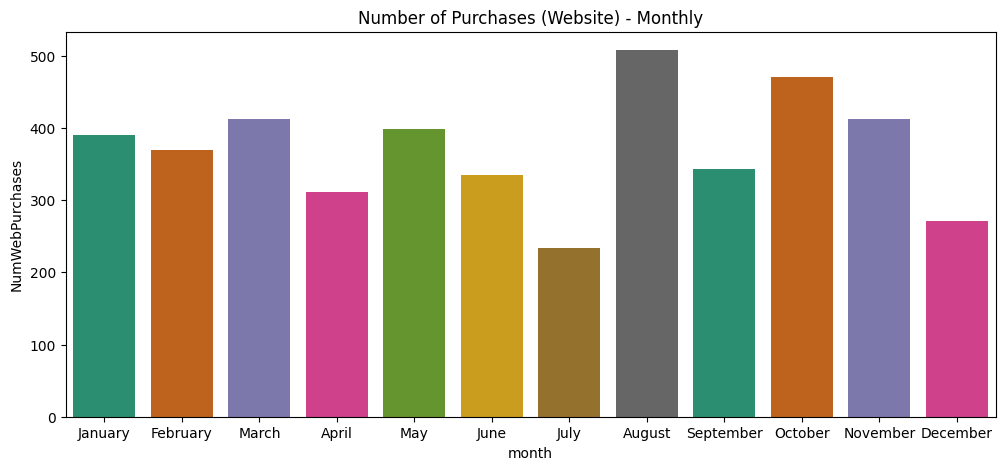

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the sum of NumWebPurchases on a monthly basis
plt.figure(figsize = (12,5))

sns.barplot(x='month', y='NumWebPurchases', data=df_new.groupby('month')['NumWebPurchases'].sum().reset_index(), palette = 'Dark2')
plt.title('Number of Purchases (Website) - Monthly')
plt.show()



*   Insights :
 Highest Number of Purchase made in `Auguest` and lowest number of purchase made in `July`



###3. Line chart for showing Number of Purchase made through website per Day

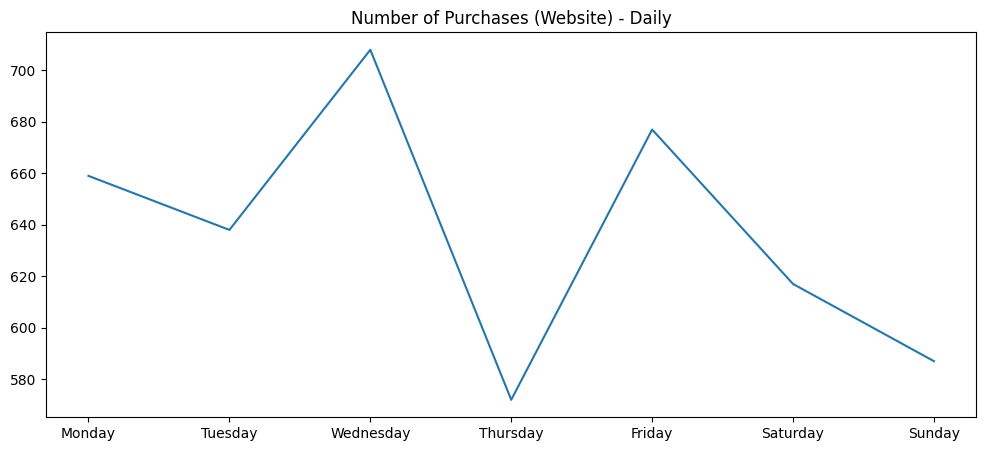

In [94]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' to a categorical variable with a specified order
df_new['Day'] = pd.Categorical(df_new['Day'], categories=day_order, ordered=True)

plt.figure(figsize = (12,5))
plt.plot('Day','NumWebPurchases',data=df_new.groupby('Day')['NumWebPurchases'].sum().reset_index())
plt.title('Number of Purchases (Website) - Daily')
plt.show()




*   Insights : Highest number purchase made on `Wednesday` and Least number of purchase on `Thursday`

###4. Scatter plot to visualize relationship between Income and total spending Based on Marital Status

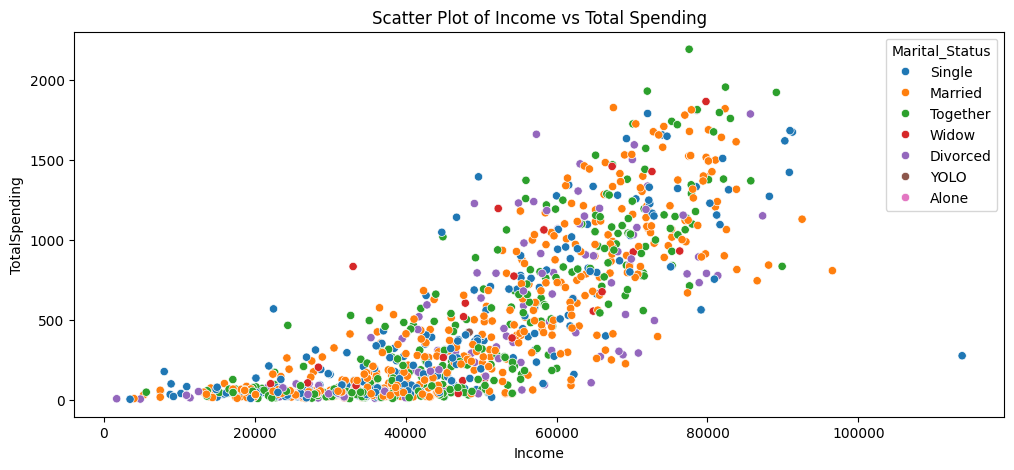

In [95]:
plt.figure(figsize = (12,5))
sns.scatterplot(x='Income', y='TotalSpending', hue='Marital_Status', data=df_new)
plt.title('Scatter Plot of Income vs Total Spending')
plt.show()


*   Insights : Here we can see income is directly proportional to TotalSpending and Mostlty people who are married or Together are more likly to spent more

###5. Pie chart to know the distribution of Complain and Response

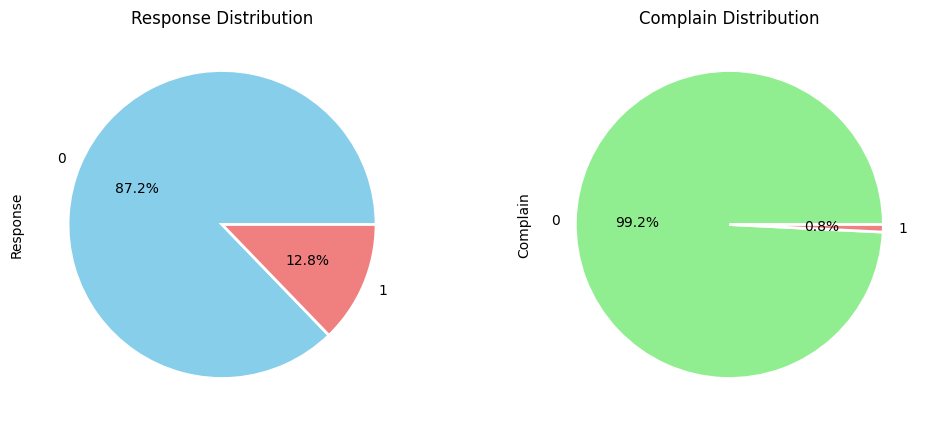

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the pie chart for 'Response'
df_new['Response'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], wedgeprops=dict(linewidth=2, edgecolor='white'), ax=axes[0])
axes[0].set_title('Response Distribution')

# Plotting the pie chart for 'Complain'
df_new['Complain'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], wedgeprops=dict(linewidth=2, edgecolor='white'), ax=axes[1])
axes[1].set_title('Complain Distribution')

plt.show()




*   Insights : here we can conclude that only 12.8 % of people accepted our offers and just 0.8 % people complain about our offers and loyalty programs



###6. Now we plot a Count plot based on the Recency

<ipython-input-97-51a8fcf12e90>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df_new['Recency_meter'],palette='Dark2')


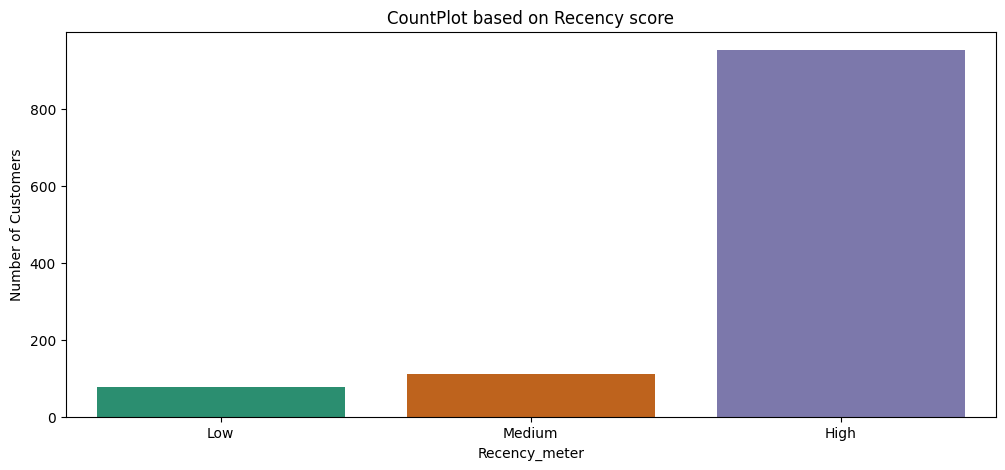

In [97]:
# here we define a Function to catagorise the values of recency (LOW, MEDIUM,HIGH)

def recency_meter(recency):
    if recency <= 5:
        return 'Low'
    elif 5 < recency <= 15:
        return 'Medium'
    else:
        return 'High'

df_new['Recency_meter'] = df_new['Recency'].apply(lambda x: recency_meter(x))


plt.figure(figsize = (12,5))
sns.countplot(x= df_new['Recency_meter'],palette='Dark2')
plt.title('CountPlot based on Recency score')
plt.ylabel('Number of Customers')
plt.show()



*   Insights : from the above chart we can see that mosltly customers recency is high (about 1000) and a very few people are frequently spending (less then 100)



 ##  Conclusion and Recommendations



1. **Suggestion based on Statistical Analysis:**


*   Expected income(Mean ) is 47529 which is in mid range so marketing team should promote their mid range products to these customers more often.


*   Expected Age of customer is 44 year  hence company should focus more on these age groups (40-45) to encourage for purchase.


*   Expected recency is  48.95 and probability of recency less then 10 is only 8 % this means only 8 % customers are spending in less then 10 days and mostly people are inactive for purchase.hence company should give more offers and discount to encourage these customers to reduce recency.

*   Probability of customer accepting an offer is only 3 % so marketing team should give more efforts and offers to the right segment of customers to increase response rate.



 2. **Recommendation Based on EDA and segmentation**




 *   customers who spend most on Wines also spent on buying Meat products so company should give complementry offers and suggestion of selling to both these products so that it provide more profit to the company.


*   In this Dataset mostly customers are either have High income and High spending habbits or Low income and low Spending so marketing team can introduce offers for their luxury brands and show advertisements to these segments and can opt diffrent strategy for other groups.

*   Highest Number of customer visiting website and purchase a product in `Auguest` and Lowest for `July` hence company should employed more no of marketing team in july month and should give more promotional offers,ads and emails to encourage more purchasing in this month.

*   Customers who Either Married or togather is most likly to spend more so comapany should give more offers and start a couple related program and product to monetise these trends .
















